## pyDGSA tutorial (detailed version)

This analytic example consists of 200 model simulations, each of which has 4 parameters and 2 responses. The model parameters are latin hypercube sampled values between 0 and 1:

| v | w | x | y | z |
|------|------|------|------|------|
|0.7975|0.5725|0.5475|0.0675|0.6225|
|0.8175|0.5125|0.3325|0.1325|0.6175|
|0.2075|0.5925|0.7475|0.3625|0.4625|
| .... | .... | .... | .... | .... |

The responses are calculated as:

| Resp. 1 | Resp. 2 | Resp. 3         | Resp. 4 |
|---|---|-----------------|---------|
| z | abs(x * (y - 1)) | sqrt(min(x, y)) | sqrt(z) |

Clearly, `z` should be the most sensitive parameter, followed by `x` and `y`. This is a modified version of the problem presented in <a href="https:doi.org/10.1007/s11004-014-9530-5">Fenwick et al. (2014)</a>, with two extra parameters (`v` and `w`) and two extra response categories.

In [85]:
import numpy as np
import pandas as pd
import os 
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt   
from matplotlib.pyplot import cm


## Read the pre-processed data
- runall sample 1 case
- LHS205 case
- 196 samples in total

In [86]:
folder_path = '../../CCUS/data/GlobalSA_exp1/'

load_dfall = pd.read_csv(os.path.join(folder_path, 'DGSA_exp1.csv'))
load_rst_npy = np.load(os.path.join(folder_path, 'DGSA_exp1.npy'))
dfexpX = load_dfall[load_dfall.columns[4:-1]]
num_sample = load_rst_npy.shape[0]

In [87]:
dfexpX

,"E_shale, psi","E_sand, psi",v_shale,v_sand,kvkh,"inj_rate, ft3/day","inj_hrzn, year"
0,4740000.00,2760000.00,0.287,0.137,0.100,3.680833e+07,10
1,11700000.00,2760000.00,0.287,0.272,0.500,1.051667e+08,10
2,11700000.00,8310000.00,0.287,0.272,1.000,7.098750e+07,30
3,11700000.00,8310000.00,0.255,0.272,2.000,3.680833e+07,10
4,8220000.00,5535000.00,0.287,0.137,0.100,7.098750e+07,30
...,...,...,...,...,...,...,...
191,11503431.60,3878265.04,0.266,0.228,0.533,4.739659e+07,16
192,7245976.62,3846273.48,0.269,0.158,0.890,6.306762e+07,16
193,10122716.13,7687501.54,0.277,0.215,0.489,3.933247e+07,18
194,6547649.78,4070065.50,0.256,0.256,1.479,6.601529e+07,24


In [88]:
allrst_max = np.zeros((num_sample, 1))
for ii in range(num_sample):
    allrst_max[ii,0] = np.max(load_rst_npy[ii,:,:,:])

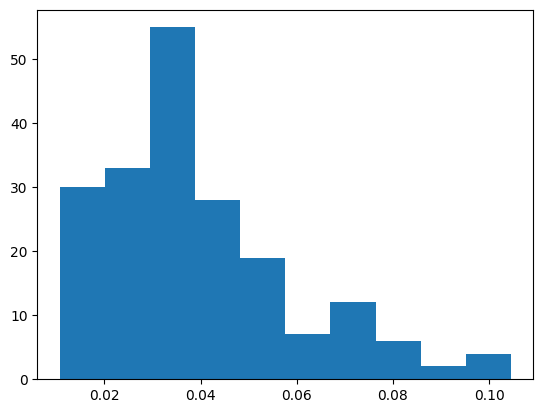

In [89]:
plt.hist(allrst_max)
plt.show()

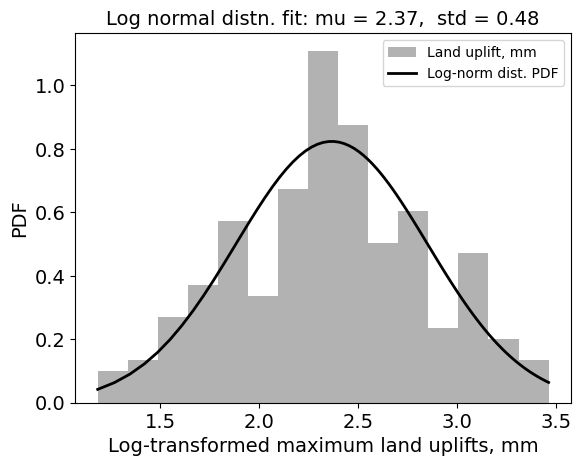

In [90]:
from scipy.stats import norm


CO2size = allrst_max*304.8

# Fit a normal distribution to the data:
mu, std = norm.fit(CO2size)
log_mu, log_std = norm.fit(np.log(CO2size))

x = np.linspace(min(CO2size), max(CO2size), 100)
p = norm.pdf(x, mu, std)
log_p = (norm.pdf(np.log(x), log_mu, log_std))
# plt.hist((CO2size), bins=25, density=True, alpha=0.6, color='gray', label='Land uplift, mm')
# plt.plot(x, p, 'k', linewidth=2, label='Norm dist. PDF')

plt.hist(np.log(CO2size), bins=15, density=True, alpha=0.6, color='gray', label='Land uplift, mm')
plt.plot(np.log(x), log_p, 'k', linewidth=2, label='Log-norm dist. PDF')

plt.xlabel('Log-transformed maximum land uplifts, mm', fontsize=14)
plt.ylabel('PDF', fontsize=14)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
title = f"Log normal distn. fit: mu = %.2f,  std = %.2f" % (log_mu, log_std)
plt.title(title, fontsize=14)
plt.legend()
plt.legend(prop={'size': 10})
plt.show()

## For 0D case

In [91]:
parameters = dfexpX.values
responses = allrst_max

parameter_names = dfexpX.columns.to_list()

### Unit change

- Young's modulus unit from psi to GPa: multiplies 6.89476e-6
- Injection rate from ft3/day to Mt/yr: divide by (35086702.42/(667259/1000000))

In [92]:
parameters[:,0] = parameters[:,0]*6.89476e-6/1000000
parameters[:,1] = parameters[:,1]*6.89476e-6/1000000

parameters[:,5] = parameters[:,5]/(35086702.42/(667259/1000000))/1000000
parameters[:,6] = parameters[:,6]*365*24*3600

In [93]:
parameters[:,6]

array([3.15360e+08, 3.15360e+08, 9.46080e+08, 3.15360e+08, 9.46080e+08,
       9.46080e+08, 3.15360e+08, 6.30720e+08, 9.46080e+08, 3.15360e+08,
       3.15360e+08, 3.15360e+08, 9.46080e+08, 6.30720e+08, 6.30720e+08,
       9.46080e+08, 9.46080e+08, 3.15360e+08, 3.15360e+08, 9.46080e+08,
       6.30720e+08, 6.30720e+08, 6.30720e+08, 6.30720e+08, 9.46080e+08,
       3.15360e+08, 3.15360e+08, 6.30720e+08, 6.30720e+08, 6.30720e+08,
       6.30720e+08, 9.46080e+08, 6.30720e+08, 6.30720e+08, 9.46080e+08,
       6.30720e+08, 3.15360e+08, 9.46080e+08, 9.46080e+08, 9.46080e+08,
       6.30720e+08, 9.46080e+08, 6.30720e+08, 3.15360e+08, 3.15360e+08,
       3.15360e+08, 9.46080e+08, 3.15360e+08, 3.15360e+08, 3.15360e+08,
       9.46080e+08, 3.15360e+08, 3.15360e+08, 3.15360e+08, 6.30720e+08,
       9.46080e+08, 3.15360e+08, 9.46080e+08, 9.46080e+08, 9.46080e+08,
       9.46080e+08, 6.30720e+08, 3.15360e+08, 6.30720e+08, 6.30720e+08,
       9.46080e+08, 9.46080e+08, 9.46080e+08, 6.30720e+08, 3.153

In [94]:
parameters[0,:]

array([3.26811624e-05, 1.90295376e-05, 2.87000000e-01, 1.37000000e-01,
       1.00000000e-01, 7.00000000e-07, 3.15360000e+08])

## Start DGSA

In [95]:
# Now, calculate the euclidean distances between model responses
from scipy.spatial.distance import pdist, squareform

distances = pdist(responses, metric='euclidean')
distances = squareform(distances)

In [96]:
# Cluster the responses using KMedoids
from pyDGSA.cluster import KMedoids

n_clusters = 3
clusterer = KMedoids(n_clusters=n_clusters, max_iter=3000, tol=1e-4)
labels, medoids = clusterer.fit_predict(distances)

It's also easy to use a different clustering method, e.g.:
```python
from sklearn.cluster import KMeans

n_clusters = 3
clusterer = KMedoids(n_clusters=n_clusters, max_iter=3000, tol=1e-4)
labels = clusterer.fit_predict(distances)
```

## Examples using `pyDGSA.dgsa`

Next, let's calculate the mean standardized  sensitivity using a specific alpha quantile (0.99 instead of 0.95) and a larger number of boots (5000 instead of 3000). Recall that the sensitivity is defined as $\frac{d}{d_{0.95}}$, so we are instead calculating $\frac{d}{d_{0.99}}$.

In [97]:
from pyDGSA.dgsa import dgsa


mean_sensitivity = dgsa(parameters, labels, parameter_names=parameter_names, quantile=0.99, 
                        n_boots=5000, confidence=True)
print(mean_sensitivity)

  0%|          | 0/5000 [00:00<?, ?it/s]

                   sensitivity  confidence
E_shale, psi          0.834506    0.380496
E_sand, psi           2.257365    0.934757
v_shale               0.504967    0.200558
v_sand                0.823530    0.373129
kvkh                  0.546771    0.237403
inj_rate, ft3/day     1.938895    0.783849
inj_hrzn, year        0.330629    0.147957


Instead of showing the mean sensitivity averaged across all clusters, it's also possible to return the standardized sensitivity for each individual cluster. The example below provides names for each cluster, assuming you know the unique characteristics that define each cluster.

In [98]:
cluster_names = [f'Cluster{i+1}' for i in range(n_clusters)]

cluster_sensitivity = dgsa(parameters, labels, parameter_names=parameter_names, 
                           output='cluster_avg', cluster_names=cluster_names)
print(cluster_sensitivity)

  0%|          | 0/3000 [00:00<?, ?it/s]

                   Cluster1  Cluster2  Cluster3
E_shale, psi       0.471590  1.482926  1.248962
E_sand, psi        1.280033  3.914326  3.302276
v_shale            0.823814  0.910014  0.279014
v_sand             0.437546  1.457364  1.249549
kvkh               0.231666  0.896957  1.024780
inj_rate, ft3/day  0.981309  3.348852  2.983949
inj_hrzn, year     0.589660  0.248200  0.443230


## Examples using `pyDGSA.dgsa_interactions`

The pyDGSA package includes functionality for calcuating two-way parameter interactions. The fastest way to do so is to use all the default options.

In [99]:
from pyDGSA.dgsa import dgsa_interactions

mean_interact_sensitivity = dgsa_interactions(parameters, labels, 
                                              parameter_names=parameter_names)
print(mean_interact_sensitivity)

Performing DGSA:   0%|          | 0/7 [00:00<?, ?it/s]

Resampling parameter 0:   0%|          | 0/3 [00:00<?, ?it/s]

Resampling parameter 1:   0%|          | 0/3 [00:00<?, ?it/s]

Resampling parameter 2:   0%|          | 0/3 [00:00<?, ?it/s]

Resampling parameter 3:   0%|          | 0/3 [00:00<?, ?it/s]

Resampling parameter 4:   0%|          | 0/3 [00:00<?, ?it/s]

Resampling parameter 5:   0%|          | 0/3 [00:00<?, ?it/s]

Resampling parameter 6:   0%|          | 0/3 [00:00<?, ?it/s]

                                   sensitivity
E_sand, psi | inj_rate, ft3/day        1.82514
inj_rate, ft3/day | E_sand, psi       1.792012
E_sand, psi | E_shale, psi            0.933072
inj_hrzn, year | kvkh                 0.877963
kvkh | inj_hrzn, year                 0.797721
v_sand | E_shale, psi                 0.768459
kvkh | v_shale                        0.728471
v_sand | kvkh                         0.717602
inj_rate, ft3/day | v_shale           0.714674
E_sand, psi | v_shale                 0.697009
inj_rate, ft3/day | E_shale, psi      0.669823
E_shale, psi | v_shale                0.659825
E_sand, psi | v_sand                  0.633731
inj_rate, ft3/day | v_sand            0.621855
kvkh | E_shale, psi                   0.601486
E_shale, psi | kvkh                   0.594066
kvkh | E_sand, psi                    0.584679
v_sand | v_shale                      0.580976
v_shale | E_sand, psi                  0.57907
E_shale, psi | v_sand                 0.572726
inj_hrzn, yea

Or, it's possible to specify interactions between only a few conditional parameters. For example, to calculate sensitivity when `x` and `y` are conditioned to one of 5 bins:

In [100]:
sens = dgsa_interactions(parameters, labels, 
                        #  cond_parameters=['depth','deviation','length', 'direction'], 
                         cond_parameters=parameter_names,
                         parameter_names=parameter_names, 
                         n_bins=5)
print(sens)

Performing DGSA:   0%|          | 0/7 [00:00<?, ?it/s]

Resampling parameter 0:   0%|          | 0/3 [00:00<?, ?it/s]

Resampling parameter 1:   0%|          | 0/3 [00:00<?, ?it/s]

Resampling parameter 2:   0%|          | 0/3 [00:00<?, ?it/s]

Resampling parameter 3:   0%|          | 0/3 [00:00<?, ?it/s]

Resampling parameter 4:   0%|          | 0/3 [00:00<?, ?it/s]

Resampling parameter 5:   0%|          | 0/3 [00:00<?, ?it/s]

Resampling parameter 6:   0%|          | 0/3 [00:00<?, ?it/s]

                                   sensitivity
inj_rate, ft3/day | E_sand, psi       1.439924
E_sand, psi | inj_rate, ft3/day       1.409625
E_sand, psi | E_shale, psi            0.974054
E_shale, psi | E_sand, psi            0.847468
E_shale, psi | inj_rate, ft3/day      0.818582
E_sand, psi | v_shale                 0.812755
E_sand, psi | v_sand                  0.807416
kvkh | v_shale                        0.794261
E_shale, psi | v_sand                 0.778846
v_sand | E_sand, psi                  0.767689
kvkh | v_sand                         0.752434
inj_hrzn, year | kvkh                 0.749459
E_shale, psi | kvkh                   0.729882
kvkh | inj_hrzn, year                 0.726679
E_shale, psi | v_shale                0.724858
inj_rate, ft3/day | v_shale           0.707709
v_sand | v_shale                      0.673525
inj_rate, ft3/day | v_sand            0.661725
v_shale | E_sand, psi                 0.660782
inj_rate, ft3/day | E_shale, psi      0.638257
v_sand | E_sh

/Users/yunanli/Library/CloudStorage/OneDrive-Stanford/1.CUSP/sensitivity_analysis/pyDGSA/pyDGSA/dgsa.py:338: RuntimeWarning: Mean of empty slice
  sensitivity_per_bin = np.nanmean(normalized_interactions, axis=2)


The sensitivity values reported above are averaged over each cluster and bin. To get the standardized sensitivity on individual cluster/bin levels, specify the output format (`output='cluster_avg'` or `output='bin_avg'`). 

In [101]:
cluster_interact_sensitivity = dgsa_interactions(parameters, labels, 
                                                 parameter_names=parameter_names,
                                                 cluster_names=cluster_names, 
                                                 output='cluster_avg')
print(cluster_interact_sensitivity)

Performing DGSA:   0%|          | 0/7 [00:00<?, ?it/s]

Resampling parameter 0:   0%|          | 0/3 [00:00<?, ?it/s]

Resampling parameter 1:   0%|          | 0/3 [00:00<?, ?it/s]

Resampling parameter 2:   0%|          | 0/3 [00:00<?, ?it/s]

Resampling parameter 3:   0%|          | 0/3 [00:00<?, ?it/s]

Resampling parameter 4:   0%|          | 0/3 [00:00<?, ?it/s]

Resampling parameter 5:   0%|          | 0/3 [00:00<?, ?it/s]

Resampling parameter 6:   0%|          | 0/3 [00:00<?, ?it/s]

                                    Cluster1  Cluster2  Cluster3
E_sand, psi | E_shale, psi          0.590832  1.473341  0.703913
v_shale | E_shale, psi              0.508612  0.503318  0.588768
v_sand | E_shale, psi               0.944227  0.798164  0.559641
kvkh | E_shale, psi                 0.650806  0.688173  0.481236
inj_rate, ft3/day | E_shale, psi    0.633464  0.834083  0.534858
inj_hrzn, year | E_shale, psi       0.548414  0.647664  0.350168
E_shale, psi | E_sand, psi            0.6013   0.37321  0.499245
v_shale | E_sand, psi               0.638523  0.514654  0.603959
v_sand | E_sand, psi                0.334641  0.633052  0.539597
kvkh | E_sand, psi                  0.610937  0.600689  0.522687
inj_rate, ft3/day | E_sand, psi     2.609572  1.937286  0.772672
inj_hrzn, year | E_sand, psi        0.589372  0.261621   0.29768
E_shale, psi | v_shale              0.568204  0.680188  0.737748
E_sand, psi | v_shale                0.67564  0.568517  0.847362
v_sand | v_shale         

To get the standardized sensitivity for each individual bin and cluster, specify `output='indiv'`:

In [102]:
from pyDGSA.dgsa import dgsa_interactions
raw_interact_sensitivity = dgsa_interactions(parameters, labels, 
                                             parameter_names=parameter_names,
                                             cluster_names=cluster_names, 
                                             output='indiv')
print(raw_interact_sensitivity)

Performing DGSA:   0%|          | 0/7 [00:00<?, ?it/s]

Resampling parameter 0:   0%|          | 0/3 [00:00<?, ?it/s]

Resampling parameter 1:   0%|          | 0/3 [00:00<?, ?it/s]

Resampling parameter 2:   0%|          | 0/3 [00:00<?, ?it/s]

Resampling parameter 3:   0%|          | 0/3 [00:00<?, ?it/s]

Resampling parameter 4:   0%|          | 0/3 [00:00<?, ?it/s]

Resampling parameter 5:   0%|          | 0/3 [00:00<?, ?it/s]

Resampling parameter 6:   0%|          | 0/3 [00:00<?, ?it/s]

                                    Cluster1                      Cluster2  \
                                       Bin 0     Bin 1     Bin 2     Bin 0   
E_sand, psi | E_shale, psi          0.716317  0.702165   0.35433  1.710778   
v_shale | E_shale, psi               0.20626  0.766732  0.523738  0.108202   
v_sand | E_shale, psi               0.889031  1.119224  0.779059   0.29458   
kvkh | E_shale, psi                 0.453507   0.61875  0.858168  0.497863   
inj_rate, ft3/day | E_shale, psi    0.750306   0.62021  0.570517  1.093785   
inj_hrzn, year | E_shale, psi       0.441459  0.595463  0.594956  0.738643   
E_shale, psi | E_sand, psi          0.522032  0.521029  0.736469       NaN   
v_shale | E_sand, psi               0.620329  0.419577  0.885749       NaN   
v_sand | E_sand, psi                0.303645  0.181452  0.520155       NaN   
kvkh | E_sand, psi                  0.520041  0.835892  0.517871       NaN   
inj_rate, ft3/day | E_sand, psi      3.84282    2.3346  1.834241

## Examples using `pyDGSA.plot`

### Plotting `dgsa` results

First, let's generate a pareto plot of the mean_sensitivity, but only show paraemters with
sensitivty >= 1 (ie, when the hypothesis test is rejected), plus the next most sensitive parameter (`np_plot='+1'`)

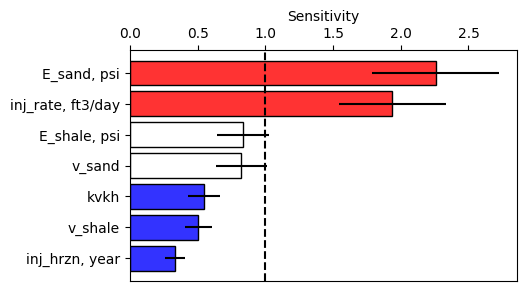

In [104]:
from pyDGSA.plot import vert_pareto_plot

fig, ax = vert_pareto_plot(mean_sensitivity, np_plot='+7', confidence=True)

It's also possible to create a pareto plot of cluster-specific sensitivities, using pre-defined colors for each cluster. Defining the colors is useful for keeping cluster colors consistent across multiple plots

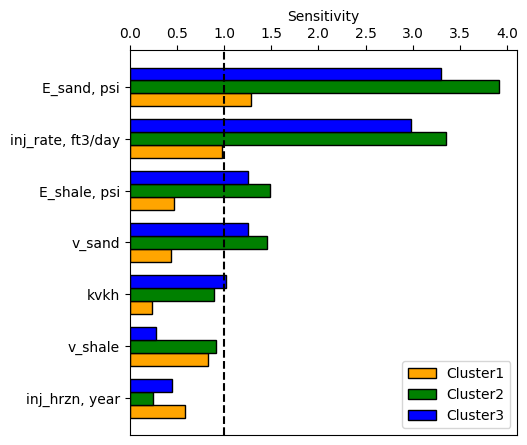

In [105]:
# Define the colors for each cluster
cluster_colors = ['orange', 'green', 'blue', 'red', 'black']

# Only plot 3 parameters total to save space (np_plot=3)
fig, ax = vert_pareto_plot(cluster_sensitivity, np_plot=7, fmt='cluster_avg', 
                           colors=cluster_colors)

Next, plot the cdf for parameter `z`, using the same color scheme as the pareto plot above.

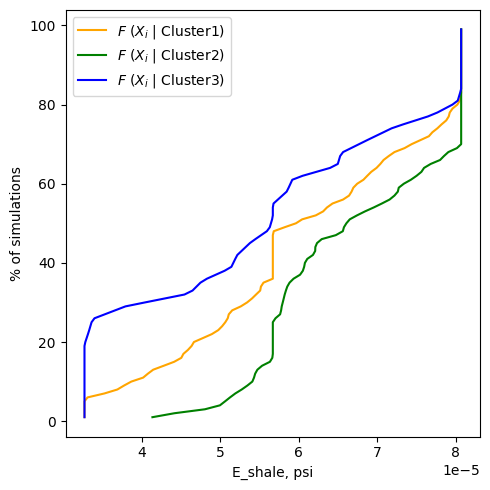

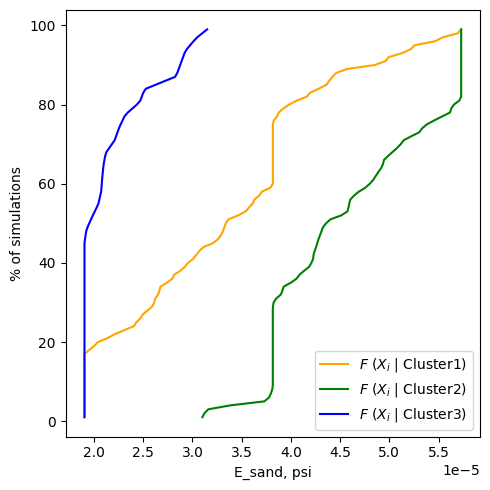

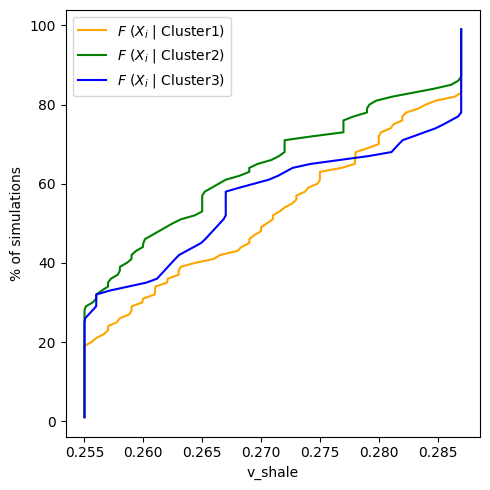

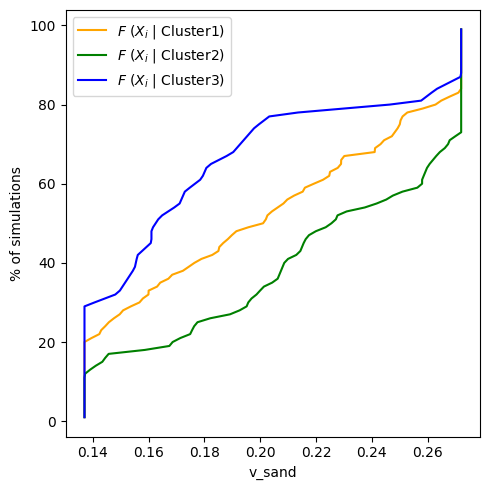

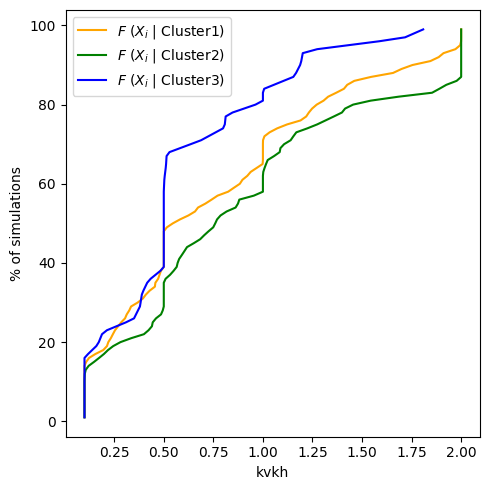

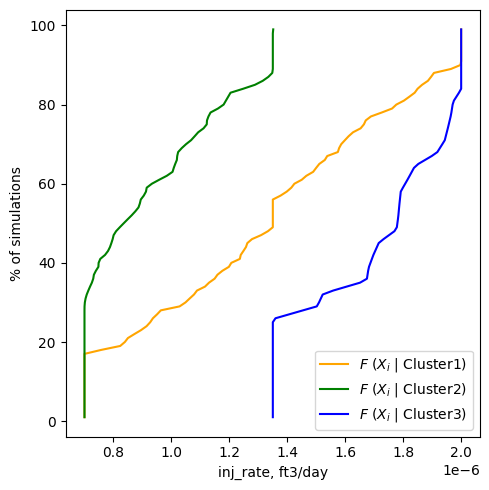

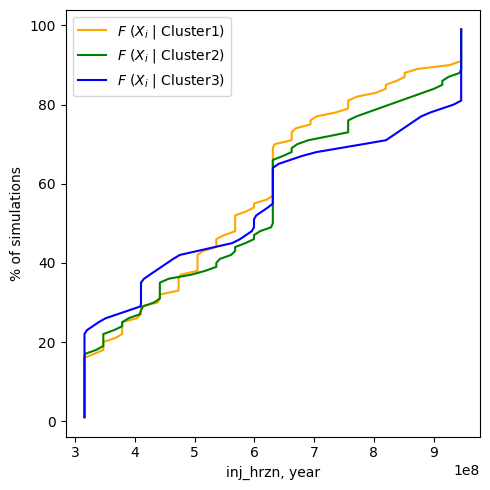

In [106]:
from pyDGSA.plot import plot_cdf

for item in parameter_names:
    fig, ax = plot_cdf(parameters, labels, item, parameter_names=parameter_names, 
                    cluster_names=cluster_names, colors=cluster_colors)

### Plotting response clusters

Next, let's plot the distance between simulations using multidimensional scaling.
This is important, as these distances are the defining feature that control all
other sensitivity calculations.

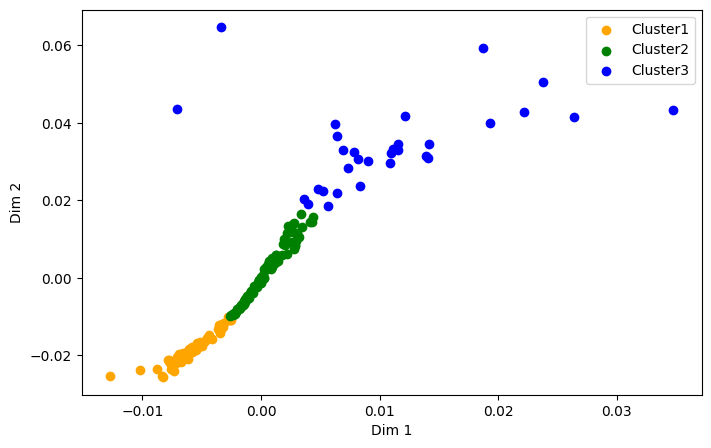

In [79]:
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

# Get MDS representation of distance matrix
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=1, normalized_stress=False)
mds_dist = mds.fit_transform(distances)

## Plot mds distances as scatterplot
fig, ax = plt.subplots(figsize=(8, 5), facecolor='white')
x = mds_dist[:, 0]
y = mds_dist[:, 1]

# Plotting each cluster individually using a for loop,
# though it's possible to plot all clusters at once using
# ax.scatter(x, y, c=[cluster_colors[i] for i in labels])
for i in range(n_clusters):
    sc = ax.scatter(x[labels == i], y[labels == i],
                    c=cluster_colors[i], label=cluster_names[i])
ax.set(xlabel='Dim 1', ylabel='Dim 2')
ax.legend()

### Plotting `dgsa_interactions` results

To display pareto plots of two-way parameter interactions averaged across each cluster and each bin, the options are the same as when plotting `dgsa` results

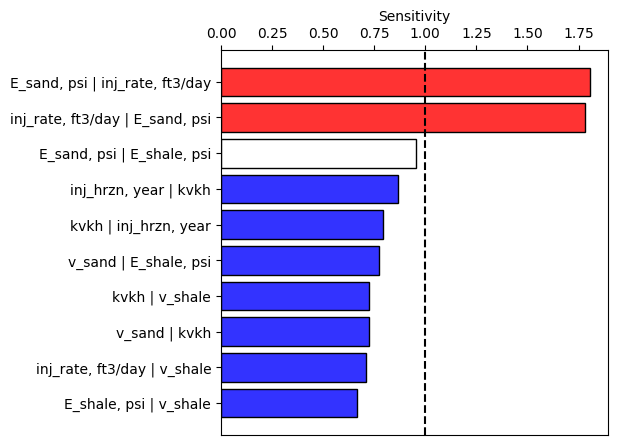

In [85]:
# Only show interactions with sensitivity >= 1 and the next 5 most 
# sensitive interactions (np_plot = '+8')
fig, ax = vert_pareto_plot(mean_interact_sensitivity, np_plot='+8')

Similarly, the options when cluster-specific `dgsa_interactions` results is the same as when plotting cluster-specific `dgsa` results.

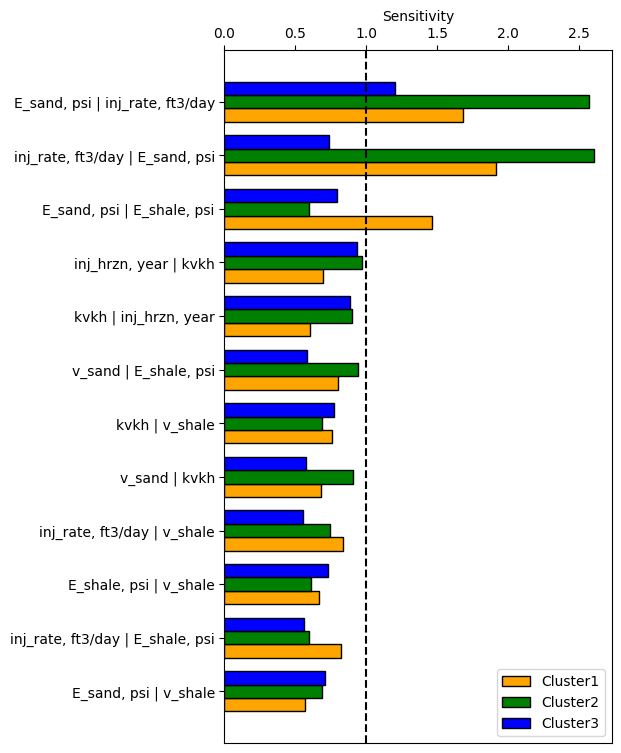

In [86]:
# By default, np_plot = '+5'
fig, ax = vert_pareto_plot(cluster_interact_sensitivity, 
                           fmt='cluster_avg',
                           np_plot = '+8',
                           colors=cluster_colors)

Plot the standardized sensitivity for each bin/cluster combination is also possible. Note that the bars with a bold outline represent those for which the sensitivity >= 1.

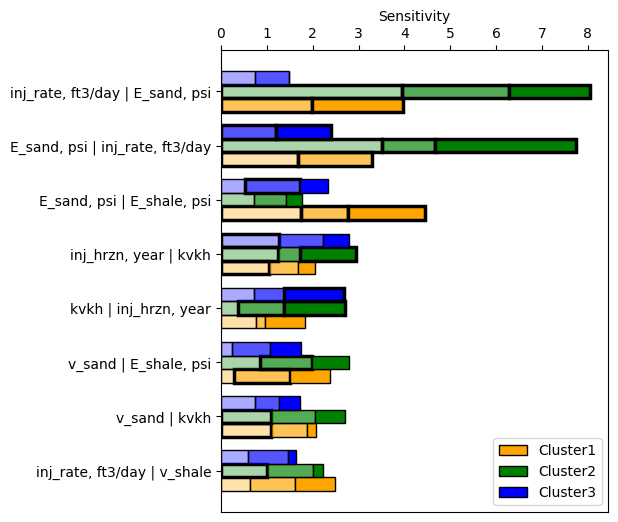

In [87]:
fig, ax = vert_pareto_plot(raw_interact_sensitivity, 
                           fmt='indiv',
                           colors=cluster_colors,
                           np_plot=8)